In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

path = 'LP_data/dataset/P{}/G{}/R{}_l.png'

In [2]:
training_paths = []
labels = []
for p in range(1, 8):
    for g in range(1, 11):
        for r in range(1, 21):
            fname = path.format(p, g, r)
            training_paths.append(fname)
            labels.append(g)
print(len(labels))

1400


(1, 316)


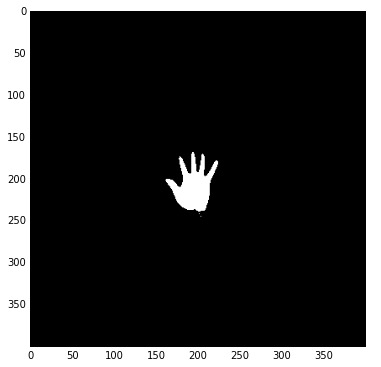

In [13]:
p = training_paths[170]
img = cv2.imread(p, 0)

plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')

_, contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
X = contours[-1][:, 0][:, 0].astype(float).reshape((1, -1))
Y = contours[-1][:, 0][:, 1].astype(float).reshape((1, -1))
print(X.shape)

Iteration: 4781


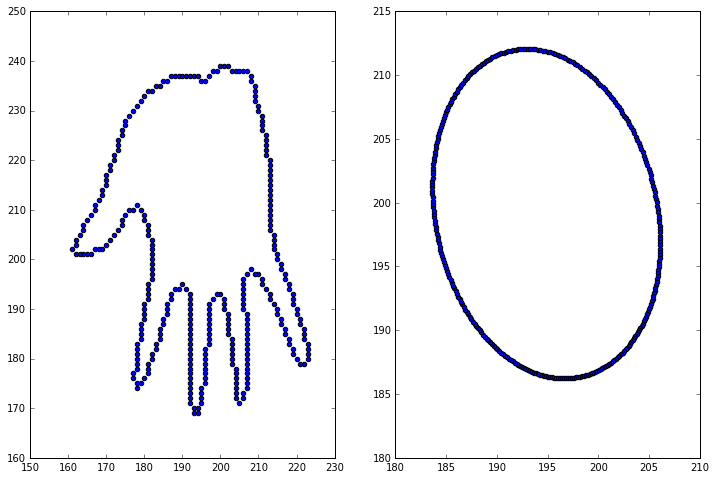

In [14]:
def smooth_data(src):
    coef = [0.25, 0.5, 0.25]
    dst = src.copy()
    r, c = src.shape
    for i in range(1, c - 1):
        dst[0][i] = coef[0] * dst[0][i-1] + coef[1] * dst[0][i] + coef[2] * dst[0][i+1]
    dst[0][0] = coef[0] * dst[0][c-1] + coef[1] * dst[0][0] + coef[2] * dst[0][1]
    dst[0][c-1] = coef[0] * dst[0][c-2] + coef[1] * dst[0][c-1] + coef[2] * dst[0][0]
    return dst

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X, Y)

X_smooth = smooth_data(X)
Y_smooth = smooth_data(Y)

cnt = 1
while True:
    new_X = smooth_data(X_smooth)
    new_Y = smooth_data(Y_smooth)
    if np.all(np.isclose(new_X, X_smooth)) and np.all(np.isclose(new_Y, Y_smooth)):
        print("Iteration: {}".format(cnt))
        break
    cnt += 1
    X_smooth = new_X
    Y_smooth = new_Y
    
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_smooth, Y_smooth)

def animate(sigma):
    global X_smooth, Y_smooth, scatter
    width = 3
    # G = cv2.transpose(cv2.getGaussianKernel(width, sigma, cv2.CV_32FC1))
    # X_smooth = cv2.filter2D(X, -1, G)
    # Y_smooth = cv2.filter2D(Y, -1, G)

    X_smooth = smooth_data(X_smooth)
    Y_smooth = smooth_data(Y_smooth)
    scatter.remove()
    scatter = plt.scatter(X_smooth, Y_smooth)
    return scatter

# fig = plt.figure(figsize=(8, 6))
# plt.gca().invert_yaxis()
# scatter = plt.scatter([], [])
# anim = animation.FuncAnimation(fig, animate, frames=256, interval=50)
# HTML(anim.to_html5_video())

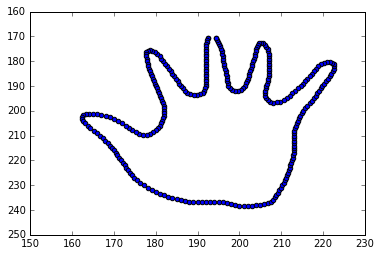

In [6]:
sigma = 2
width = 51
G = cv2.transpose(cv2.getGaussianKernel(width, sigma, cv2.CV_32FC1))
X_smooth = cv2.filter2D(X, -1, G)
Y_smooth = cv2.filter2D(Y, -1, G)
dG = cv2.Sobel(G, -1, 1, 0, 3)
ddG = cv2.Sobel(G, -1, 2, 0, 3)
dG = cv2.flip(dG, 0)
ddG = cv2.flip(ddG, 0)

anchor = (dG.shape[1] - 1, dG.shape[0] - 1)
dX = cv2.filter2D(X, -1, dG, anchor)
dY = cv2.filter2D(Y, -1, anchor)
ddX = cv2.filter2D(X, -1, ddG, anchor)
ddY = cv2.filter2D(Y, -1, ddG, anchor)

plt.gca().invert_yaxis()
plt.scatter(X_smooth, Y_smooth)